In [1]:
spark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1578229294555_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
# if working locally type the following command in a new terminal before reading the dataset
# hdfs dfs -put kddcup.data.corrected

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# Visualization imports
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
jmespath                   0.9.4  
lxml                       4.4.1  
mysqlclient                1.4.4  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pip                        19.3.1 
py-dateutil                2.2    
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
setuptools                 44.0.0 
six                        1.12.0 
soupsieve                  1.9.4  
wheel                      0.33.6 
windmill                   1.6

In [4]:
# missing pandas, matplotlib and seaborn
sc.install_pypi_package("pandas==0.25.3")
sc.install_pypi_package("matplotlib==3.1.2")
sc.install_pypi_package("seaborn==0.9.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl

  Us

In [5]:
#confirm installations
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
cycler                     0.10.0 
jmespath                   0.9.4  
kiwisolver                 1.1.0  
lxml                       4.4.1  
matplotlib                 3.1.2  
mysqlclient                1.4.4  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pandas                     0.25.3 
pip                        19.3.1 
py-dateutil                2.2    
pyparsing                  2.4.6  
python-dateutil            2.8.1  
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
scipy                      1.4.1  
seaborn                    0.9.0  
setuptools                 44.0.0 
six                        1.12.0 
soupsieve                  1.9.4  
wheel                      0.33.6 
windmill                   1.6

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
sns.set(style="darkgrid")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
# Load the dataset
df_no_header=spark.read.csv('s3://network-anomaly-detection-bucket/kddcup.data.corrected',inferSchema=True,header=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
# Load columns
df=df_no_header.toDF("duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
"hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
"num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count",
"serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
"dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
"dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
# Cache the DataFrame to avoid recomputation
df.cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[duration: int, protocol_type: string, service: string, flag: string, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, label: string]

In [11]:
# label count in desc order
df.select('label').groupBy('label').count().orderBy('count',ascending=False).show(25,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-------+
|label           |count  |
+----------------+-------+
|smurf.          |2807886|
|neptune.        |1072017|
|normal.         |972781 |
|satan.          |15892  |
|ipsweep.        |12481  |
|portsweep.      |10413  |
|nmap.           |2316   |
|back.           |2203   |
|warezclient.    |1020   |
|teardrop.       |979    |
|pod.            |264    |
|guess_passwd.   |53     |
|buffer_overflow.|30     |
|land.           |21     |
|warezmaster.    |20     |
|imap.           |12     |
|rootkit.        |10     |
|loadmodule.     |9      |
|ftp_write.      |8      |
|multihop.       |7      |
|phf.            |4      |
|perl.           |3      |
|spy.            |2      |
+----------------+-------+

In [12]:
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.feature import VectorAssembler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# drop nonnumeric features
numericOnly = df.drop('protocol_type', 'service', 'flag').cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# create feature vector
assembler = VectorAssembler(inputCols=list(filter(lambda x: x != 'label', numericOnly.columns)), outputCol='featureVector') 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
kmeans = KMeans(predictionCol='cluster', featuresCol='featureVector')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
pipeline = Pipeline(stages=[assembler, kmeans])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
pipelineModel = pipeline.fit(numericOnly)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
# Select the kmeans stage
kmeansModel = pipelineModel.stages[-1]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# print centroids of each cluster
for centroid in kmeansModel.clusterCenters(): 
    print(centroid)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[4.83401949e+01 1.83462155e+03 8.26203190e+02 5.71611720e-06
 6.48779303e-04 7.96173468e-06 1.24376586e-02 3.20510858e-05
 1.43529049e-01 8.08830584e-03 6.81851124e-05 3.67464677e-05
 1.29349608e-02 1.18874823e-03 7.43095237e-05 1.02114351e-03
 0.00000000e+00 4.08294086e-07 8.35165553e-04 3.34973508e+02
 2.95267146e+02 1.77970317e-01 1.78036989e-01 5.76648988e-02
 5.77299094e-02 7.89884132e-01 2.11796106e-02 2.82608101e-02
 2.32981078e+02 1.89214283e+02 7.53713390e-01 3.07109788e-02
 6.05051931e-01 6.46410789e-03 1.78091184e-01 1.77885898e-01
 5.79276115e-02 5.76592214e-02]
[1.0999000e+04 0.0000000e+00 1.3099374e+09 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 2.5500000e+02 1.00000

In [20]:
withCluster = pipelineModel.transform(numericOnly)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
# select cluster, label and respective number of ocurrences for each cluster
withCluster.select('cluster', 'label').groupBy('cluster', 'label').count().orderBy('count', ascending=False).show(25)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------------+-------+
|cluster|           label|  count|
+-------+----------------+-------+
|      0|          smurf.|2807886|
|      0|        neptune.|1072017|
|      0|         normal.| 972781|
|      0|          satan.|  15892|
|      0|        ipsweep.|  12481|
|      0|      portsweep.|  10412|
|      0|           nmap.|   2316|
|      0|           back.|   2203|
|      0|    warezclient.|   1020|
|      0|       teardrop.|    979|
|      0|            pod.|    264|
|      0|   guess_passwd.|     53|
|      0|buffer_overflow.|     30|
|      0|           land.|     21|
|      0|    warezmaster.|     20|
|      0|           imap.|     12|
|      0|        rootkit.|     10|
|      0|     loadmodule.|      9|
|      0|      ftp_write.|      8|
|      0|       multihop.|      7|
|      0|            phf.|      4|
|      0|           perl.|      3|
|      0|            spy.|      2|
|      1|      portsweep.|      1|
+-------+----------------+-------+

In [22]:
# The result shows that the clustering was not at all helpful. Only one data point ended up in cluster 1!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
# Choosing k

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
from random import randint

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
# Assemble features, train the model and return the training cost
def clusteringScore0(data, k: int) -> float:
    assembler = VectorAssembler(inputCols=list(filter(lambda x: x != 'label', data.columns)), outputCol='featureVector')
    kmeans = KMeans(predictionCol='cluster', featuresCol='featureVector').setSeed(randint(1, 10)).setK(k)
    pipeline = Pipeline(stages=[assembler, kmeans])
    kmeansModel = pipeline.fit(data).stages[-1]
    return kmeansModel.summary.trainingCost

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
# for each k starting at 20 by 20 until 101 (exclusive)
xValues = []
yValues = []
for k in range(20, 101, 20):
    score = clusteringScore0(numericOnly, k)
    xValues.append(k)
    yValues.append(score)
    print(k, score)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

20 3888082742412247.0
40 614806655855173.5
60 54082862177276.86
80 54082861854051.64
100 81196455017251.78

In [27]:
# elbow graph to better understand k/score relationship
elbow_df = pd.DataFrame.from_dict({'Clusters': xValues, 'Inertia': yValues})
sns.relplot(x="Clusters", y="Inertia", kind="line", data=elbow_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

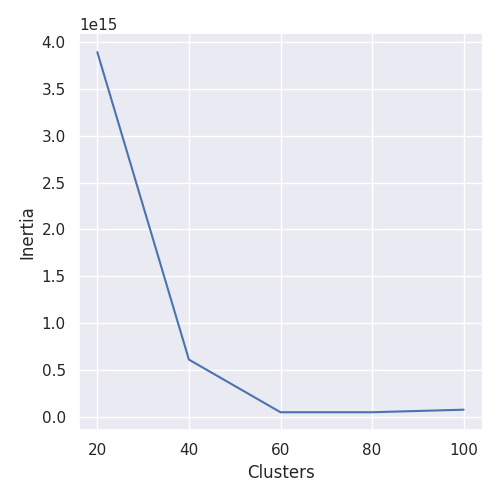

In [28]:
%matplot plt

In [144]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
# maxIter uses more computation in order to have more iterations and preventing the algorithm stopping to early
# tol controls  the  minimum  amount  of  cluster  centroid  movement  considered significant
# default values are maxIter=20 and tol=0.0001
def clusteringScore1(data, k: int) -> float:
    assembler = VectorAssembler(inputCols=list(filter(lambda x: x != 'label', data.columns)), outputCol='featureVector')
    kmeans = KMeans(predictionCol='cluster', featuresCol='featureVector', maxIter=40, tol=0.00001).setSeed(randint(1, 10)).setK(k)
    pipeline = Pipeline(stages=[assembler, kmeans])
    kmeansModel = pipeline.fit(data).stages[-1]
    return kmeansModel.summary.trainingCost

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
xValues = []
yValues = []
for k in range(20, 101, 20):
    score = clusteringScore1(numericOnly, k)
    xValues.append(k)
    yValues.append(score)
    print(k, score)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

20 1563494026082292.5
40 595053753658715.9
60 84528290382745.89
80 92512815090833.66
100 33838412826569.54

In [32]:
elbow_df = pd.DataFrame.from_dict({'Clusters': xValues, 'Inertia': yValues})
sns.relplot(x="Clusters", y="Inertia", kind="line", data=elbow_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

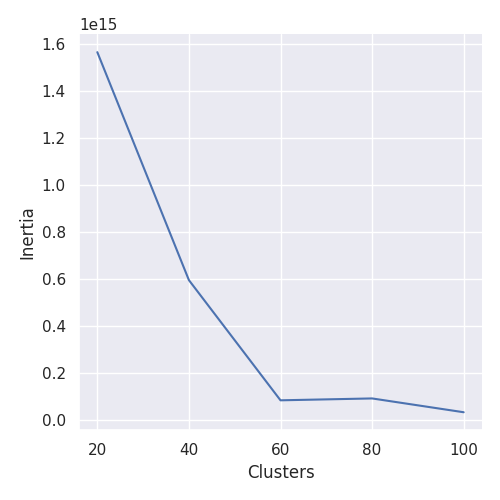

In [33]:
%matplot plt

In [145]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
# Visualization

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
# Let's admit that k=60 is a good value for clustering, for now

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
# 1% of the dataset for visualization
numericOnlySample = numericOnly.sample(False, 0.01, seed=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
assembler = VectorAssembler(inputCols=list(filter(lambda x: x != 'label', numericOnlySample.columns)), outputCol='featureVector')
kmeans = KMeans(predictionCol='cluster', featuresCol='featureVector', maxIter=40, tol=0.00001).setSeed(randint(1, 10)).setK(60)
pipeline = Pipeline(stages=[assembler, kmeans])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
pipelineModel = pipeline.fit(numericOnlySample)
transformedModel = pipelineModel.transform(numericOnlySample)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
clusteringPd = transformedModel.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
# graphical representation of data points per cluster
chart = sns.catplot(x="cluster", kind="count", data=clusteringPd)
chart.set_xticklabels('')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

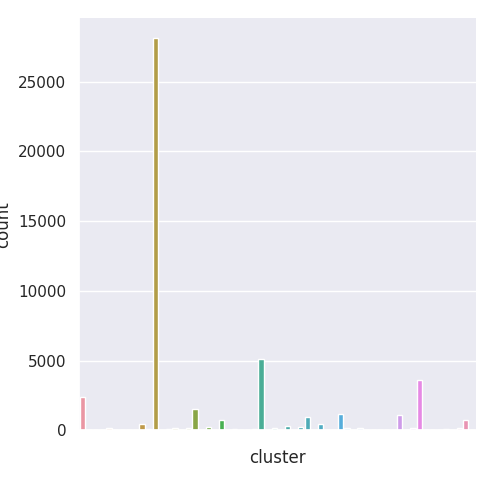

In [42]:
%matplot plt

In [146]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
transformedModelWithoutLabel = transformedModel.drop('label')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
transformedModelWithoutLabel.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'featureVector', 'cluster']

In [46]:
# Using PCA for dimensionality reduction
from pyspark.ml.feature import PCA
pca = PCA(k=2, inputCol="featureVector", outputCol="pca_features")
model = pca.fit(transformedModelWithoutLabel)
pcaTransformed = model.transform(transformedModelWithoutLabel)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
pcaFeatures = pcaTransformed.toPandas().pca_features

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
pcaMatrix = []
for vector in pcaFeatures:
    pcaMatrix.append([vector[0], vector[1]])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
df_pca = pd.DataFrame(pcaMatrix, columns = ['Principal Component 1', 'Principal Component 2']) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
graph = sns.relplot(x="Principal Component 1", y="Principal Component 2", data=df_pca)
graph.set_xticklabels(rotation=45)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

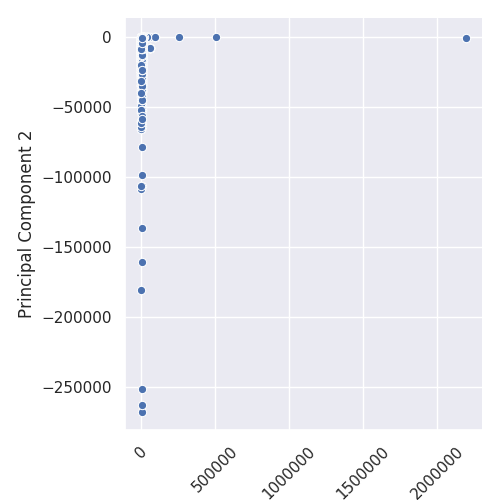

In [51]:
%matplot plt

In [147]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
# L shape makes sense since src_bytes and dst_bytes have values that are on a much larger scale than the others 
# that have values 0 or 1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
# Feature normalization using StandardScaler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
from pyspark.ml.feature import StandardScaler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
def clusteringscore2(data, k: int) -> float:
    assembler = VectorAssembler(inputCols=list(filter(lambda x: x != 'label', data.columns)), outputCol='featureVector')
    scaler = StandardScaler(inputCol='featureVector', outputCol='scaledFeatureVector', withStd=True, withMean=False)
    kmeans = KMeans(predictionCol='cluster', featuresCol='scaledFeatureVector', maxIter=40, tol=0.00001).setSeed(randint(1, 10)).setK(k)
    pipeline = Pipeline(stages=[assembler, scaler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return kmeansModel.summary.trainingCost

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
# for each k starting at 60 by 30 until 271 (exclusive)
xValues = []
yValues = []
for k in range(60, 271, 30):
    score = clusteringscore2(numericOnly, k)
    xValues.append(k)
    yValues.append(score)
    print(k, score)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

60 5957207.287455985
90 3608672.931221433
120 2721572.259966789
150 2114261.1215608185
180 1618708.2878091699
210 1383934.677533441
240 1263797.231050257
270 1076121.846006316

In [59]:
elbow_df = pd.DataFrame.from_dict({'Clusters': xValues, 'Inertia': yValues})
sns.relplot(x="Clusters", y="Inertia", kind="line", data=elbow_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

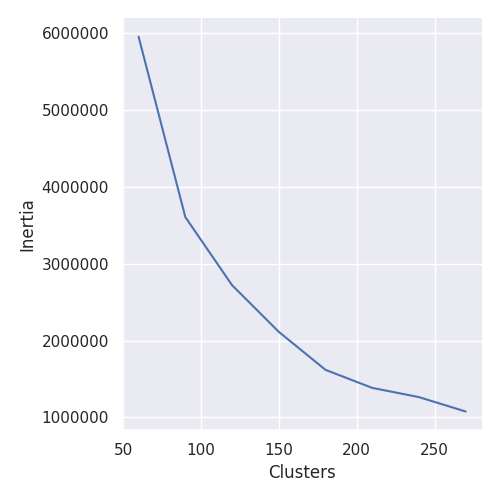

In [60]:
%matplot plt

In [148]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:
# k=180 seems like the best value right now

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
# Using same sample as before
assembler = VectorAssembler(inputCols=list(filter(lambda x: x != 'label', numericOnlySample.columns)), outputCol='featureVector')
scaler = StandardScaler(inputCol='featureVector', outputCol='scaledFeatureVector', withStd=True, withMean=False)
kmeans = KMeans(predictionCol='cluster', featuresCol='scaledFeatureVector', maxIter=40, tol=0.00001).setSeed(randint(1, 10)).setK(180)
pipeline = Pipeline(stages=[assembler, scaler, kmeans])
pipelineModel = pipeline.fit(numericOnlySample)
transformedModel = pipelineModel.transform(numericOnlySample)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
transformedModelWithoutLabel = transformedModel.drop('label')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
pca = PCA(k=2, inputCol="scaledFeatureVector", outputCol="pca_features")
model = pca.fit(transformedModelWithoutLabel)
pcaTransformed = model.transform(transformedModelWithoutLabel)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
pcaFeatures = pcaTransformed.toPandas().pca_features
pcaMatrix = []
for vector in pcaFeatures:
    pcaMatrix.append([vector[0], vector[1]])
df_pca = pd.DataFrame(pcaMatrix, columns = ['Principal Component 1', 'Principal Component 2'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [92]:
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", palette="ch:r=-.2,d=.3_r", s=10, data=df_pca)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

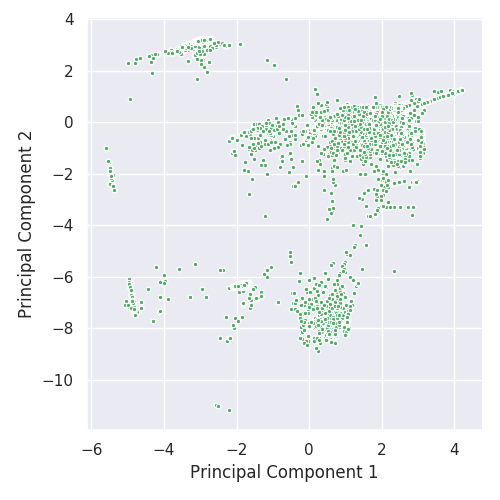

In [93]:
%matplot plt

In [149]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [95]:
# Categorical Variables

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [96]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [97]:
# StringIndexer indexes the strings to numeric values like 0, 1, 2...
# OneHotEncoder encodes the values into a vector
def oneHotPipeline(inputCol: str) -> (Pipeline, str):
    indexer = StringIndexer(inputCol=inputCol, outputCol=inputCol + '_indexed')
    encoder = OneHotEncoder(inputCol=inputCol + '_indexed', outputCol=inputCol + '_vec')
    pipeline = Pipeline(stages=[indexer, encoder])
    return (pipeline, inputCol + '_vec')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [98]:
def clusteringScore3(data, k: int) -> float:
    (protoTypeEncoder, protoTypeVecCol) = oneHotPipeline('protocol_type')
    (serviceEncoder, serviceVecCol) = oneHotPipeline('service')
    (flagEncoder, flagVecCol) = oneHotPipeline('flag')
    
    # replace nonnumeric columns by the new numeric columns
    assembleCols = set(data.columns).difference({"label", "protocol_type", "service", "flag"}).union({protoTypeVecCol, serviceVecCol, flagVecCol})
    
    assembler = VectorAssembler(inputCols=list(assembleCols), outputCol='featureVector')
    scaler = StandardScaler(inputCol='featureVector', outputCol='scaledFeatureVector', withStd=True, withMean=False)
    kmeans = KMeans(predictionCol='cluster', featuresCol='scaledFeatureVector', maxIter=40, tol=0.00001).setSeed(randint(1, 10)).setK(k)
    pipeline = Pipeline(stages=[protoTypeEncoder, serviceEncoder, flagEncoder, assembler, scaler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return kmeansModel.summary.trainingCost

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
xValues = []
yValues = []
for k in range(60, 271, 30):
    score = clusteringScore3(df, k)
    xValues.append(k)
    yValues.append(score)
    print(k, score)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

60 193038129.55779696
90 83494955.24092044
120 16603088.049615229
150 11176356.123588841
180 8635457.264023801
210 6378831.553440295
240 5522056.791369964
270 6422007.64329381

In [100]:
elbow_df = pd.DataFrame.from_dict({'Clusters': xValues, 'Inertia': yValues})
sns.relplot(x="Clusters", y="Inertia", kind="line", data=elbow_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

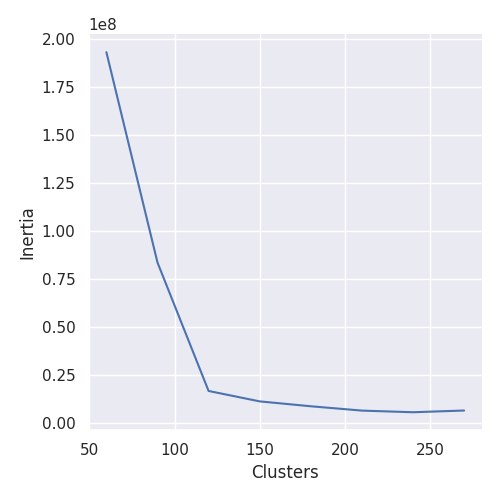

In [101]:
%matplot plt

In [136]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [104]:
# k=150 seems like the best value at the moment

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [103]:
# we want to use all features for visualization now
df_sample = df.sample(False, 0.01, seed=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [105]:
(protoTypeEncoder, protoTypeVecCol) = oneHotPipeline('protocol_type')
(serviceEncoder, serviceVecCol) = oneHotPipeline('service')
(flagEncoder, flagVecCol) = oneHotPipeline('flag')
assembleCols = set(df_sample.columns).difference({"label", "protocol_type", "service", "flag"}).union({protoTypeVecCol, serviceVecCol, flagVecCol})
assembler = VectorAssembler(inputCols=list(assembleCols), outputCol='featureVector')
scaler = StandardScaler(inputCol='featureVector', outputCol='scaledFeatureVector', withStd=True, withMean=False)
kmeans = KMeans(predictionCol='cluster', featuresCol='scaledFeatureVector', maxIter=40, tol=0.00001).setSeed(randint(1, 10)).setK(150)
pipeline = Pipeline(stages=[protoTypeEncoder, serviceEncoder, flagEncoder, assembler, scaler, kmeans])
pipelineModel = pipeline.fit(df_sample)
transformedModel = pipelineModel.transform(df_sample)
transformedModelWithoutLabel = transformedModel.drop('label')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [106]:
pca = PCA(k=2, inputCol="scaledFeatureVector", outputCol="pca_features")
model = pca.fit(transformedModelWithoutLabel)
pcaTransformed = model.transform(transformedModelWithoutLabel)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [107]:
pcaFeatures = pcaTransformed.toPandas().pca_features
pcaMatrix = []
for vector in pcaFeatures:
    pcaMatrix.append([vector[0], vector[1]])
df_pca = pd.DataFrame(pcaMatrix, columns = ['Principal Component 1', 'Principal Component 2'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [197]:
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", s=10, data=df_pca)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

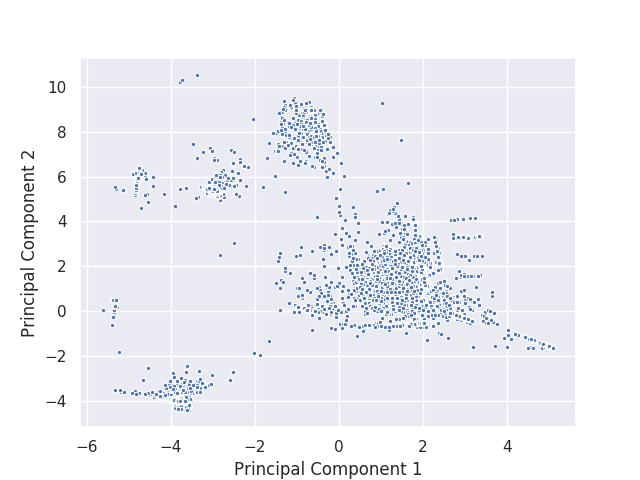

In [198]:
%matplot plt

In [199]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [200]:
# Entropy as Cluster Score

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [201]:
import math

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [202]:
# Standard function representation of information entropy 
def entropy(counts: iter) -> float:
    values = list(filter(lambda x: x > 0, counts))
    n = sum(map(lambda x: float(x), values))
    result = 0
    for v in values:
        p = v / n
        result += -p * math.log(p)
    return result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [203]:
# Define new pipeline for new experience with entropy

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [204]:
from pyspark.ml import PipelineModel

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [205]:
def fitPipeline4(data, k: int) -> PipelineModel:
    (protoTypeEncoder, protoTypeVecCol) = oneHotPipeline('protocol_type')
    (serviceEncoder, serviceVecCol) = oneHotPipeline('service')
    (flagEncoder, flagVecCol) = oneHotPipeline('flag')
    
    assembleCols = set(data.columns).difference({'label', 'protocol_type', 'service', 'flag'}).union({protoTypeVecCol, serviceVecCol, flagVecCol})
    
    assembler = VectorAssembler(inputCols=list(assembleCols), outputCol='featureVector')
    scaler = StandardScaler(inputCol='featureVector', outputCol='scaledFeatureVector', withStd=True, withMean=False)
    kmeans = KMeans(predictionCol='cluster', featuresCol='scaledFeatureVector', maxIter=40, tol=0.00001).setSeed(randint(1, 10)).setK(k)
    pipeline = Pipeline(stages=[protoTypeEncoder, serviceEncoder, flagEncoder, assembler, scaler, kmeans])
    pipelineModel = pipeline.fit(data)
    return pipelineModel

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [206]:
import collections

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [207]:
# labels are first grouped by cluster
# for each group (cluster, iterable of labels) get the count of each label ocurrence of the cluster as a list (labelCounts) 
# and use it for the entropy function
def clusteringScore4(data, k) -> float:
    pipelineModel = fitPipeline4(data, k)
    clusterLabel = pipelineModel.transform(data).select('cluster', 'label') # already as int and string
    clusterLabels = clusterLabel.rdd.groupByKey()
    weightedClusterEntropySum = 0
    clusterLabelsCol = clusterLabels.collect()
    for group in clusterLabelsCol:
        labels = list(group[1]) # we want the iterable (labels) of the tuple
        labelCounts = list(collections.Counter(labels).values())
        weightedClusterEntropySum += len(labels) * entropy(labelCounts)
    return weightedClusterEntropySum / data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [208]:
xValues = []
yValues = []
for k in range(60, 271, 30):
    score = clusteringScore4(df, k)
    xValues.append(k)
    yValues.append(score)
    print(k, score)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

60 0.10337593670969651
90 0.023353471085140475
120 0.018798094571003128
150 0.014594006630216198
180 0.019732691823247602
210 0.010184564246086863
240 0.0102965648924063
270 0.006921924148703635

In [209]:
elbow_df = pd.DataFrame.from_dict({'Clusters': xValues, 'Inertia': yValues})
sns.relplot(x="Clusters", y="Inertia", kind="line", data=elbow_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

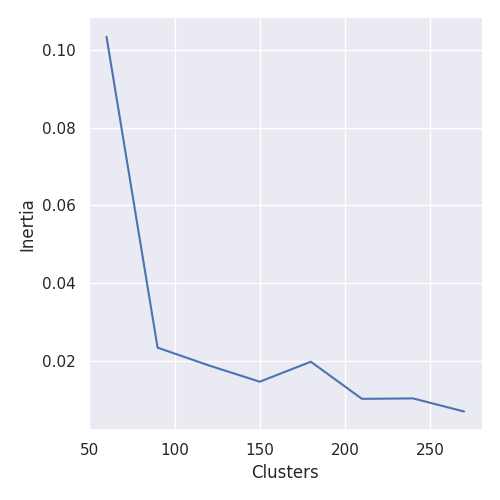

In [210]:
%matplot plt

In [211]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [212]:
# k=150 seems like the best value since the score is actually lower than when k=120 or k=180
# k=210 is a good value as well albeit more expensive

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [213]:
# Using 210 as the value for k
pipelineModel = fitPipeline4(df, 210)
countByClusterLabel = pipelineModel.transform(df).select('cluster', 'label').groupBy('cluster', 'label').count().orderBy('cluster', 'label')
countByClusterLabel.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+-------+
|cluster|     label|  count|
+-------+----------+-------+
|      0|   normal.|     51|
|      0|    smurf.|2807614|
|      1|  neptune.| 357450|
|      1|portsweep.|     62|
|      2|  neptune.|   1032|
|      2|portsweep.|      7|
|      2|    satan.|      3|
|      3|   normal.|     13|
|      3|portsweep.|     44|
|      4|  neptune.|   1038|
|      4|portsweep.|     13|
|      4|    satan.|      3|
|      5|  neptune.|    846|
|      5|   normal.|    449|
|      5|portsweep.|      7|
|      5|    satan.|      3|
|      6|   normal.|      7|
|      6|      pod.|      5|
|      7|  ipsweep.|     13|
|      7|  neptune.|   1042|
+-------+----------+-------+
only showing top 20 rows

In [214]:
# Anomaly detector

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [215]:
from pyspark.ml.linalg import Vector, Vectors

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [216]:
kMeansModel = pipelineModel.stages[-1]
centroids = kMeansModel.clusterCenters()
clustered = pipelineModel.transform(df)
vectorDistances = clustered.select('cluster', 'scaledFeatureVector').rdd.map(
lambda row: Vectors.squared_distance(centroids[row.cluster], row.scaledFeatureVector)).collect()
vectorDistances.sort(reverse=True) # so we can see the resuls in DESC order
threshold = vectorDistances[:100][-1] # 100th-farthest point distance as a threshold

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [217]:
# we will consider a distance greater than this one an anomaly
threshold

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

4623.4134839215185

In [218]:
anomalies = clustered.rdd.filter(
    lambda row: Vectors.squared_distance(centroids[row.cluster], row.scaledFeatureVector) >= threshold).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [219]:
anomalies[0] # anomaly example

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(duration=9, protocol_type='tcp', service='telnet', flag='SF', src_bytes=307, dst_bytes=2374, land=0, wrong_fragment=0, urgent=1, hot=0, num_failed_logins=0, logged_in=1, num_compromised=0, root_shell=1, su_attempted=0, num_root=1, num_file_creations=3, num_shells=1, num_access_files=0, num_outbound_cmds=0, is_host_login=0, is_guest_login=0, count=1, srv_count=1, serror_rate=0.0, srv_serror_rate=0.0, rerror_rate=0.0, srv_rerror_rate=0.0, same_srv_rate=1.0, diff_srv_rate=0.0, srv_diff_host_rate=0.0, dst_host_count=69, dst_host_srv_count=4, dst_host_same_srv_rate=0.03, dst_host_diff_srv_rate=0.04, dst_host_same_src_port_rate=0.01, dst_host_srv_diff_host_rate=0.75, dst_host_serror_rate=0.0, dst_host_srv_serror_rate=0.0, dst_host_rerror_rate=0.0, dst_host_srv_rerror_rate=0.0, label='normal.', protocol_type_indexed=1.0, protocol_type_vec=SparseVector(2, {1: 1.0}), service_indexed=11.0, service_vec=SparseVector(69, {11: 1.0}), flag_indexed=0.0, flag_vec=SparseVector(10, {0: 1.0}), feature

In [220]:
nAnomalies = len(anomalies)
totalRecords = df.count()
percentage_anomalies = nAnomalies / totalRecords

print('There are', nAnomalies ,'potential anomalies in', totalRecords ,'records of the dataset')
print('%.5f' %percentage_anomalies, '% are potential anomalies')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

There are 100 potential anomalies in 4898431 records of the dataset
0.00002 % are potential anomalies